# Servlet
---


## What does this expression language `${pageContext.request.contextPath}` exactly do in JSP EL?
---
I have a web app, where I have different navigation anchor tags such as Home, Profile and etc.

What I want:

When I press anchor tags like home or profile. I just want to ensure that current user gets its information in that Tags/JSP Page.

Sample Example that I am trying:

```java
<a  href="${pageContext.request.contextPath}/JSPAddress.jsp">Profile</a>
```


The pageContext is an implicit object available in JSPs. The EL documentation says:
> The context for the JSP page. Provides access to various objects including:    
servletContext: ...      
session: ...     
request: ...     
response: ...     


Thus this expression will get the current `HttpServletRequest` object and get the context path for the current request and append `/JSPAddress`.jsp to it to create a link (that will work even if the context-path this resource is accessed at changes).

For example, if your JSP (named `thisJSP.jsp`) is accessed at http://myhost.com/myWebApp/thisJSP.jsp, thecontext path will be `myWebApp`. Thus, the link href generated will be `/myWebApp/JSPAddress.jsp`.

If someday, you decide to deploy the JSP on another server with the context-path of ·corpWebApp·, the href generated for the link will automatically change to ·/corpWebApp/JSPAddress·.jsp without any work on your part.

> References:    
> https://stackoverflow.com/questions/5850336/what-does-this-expression-language-pagecontext-request-contextpath-exactly-do     
> https://docs.oracle.com/javaee/1.4/tutorial/doc/JSPIntro7.html

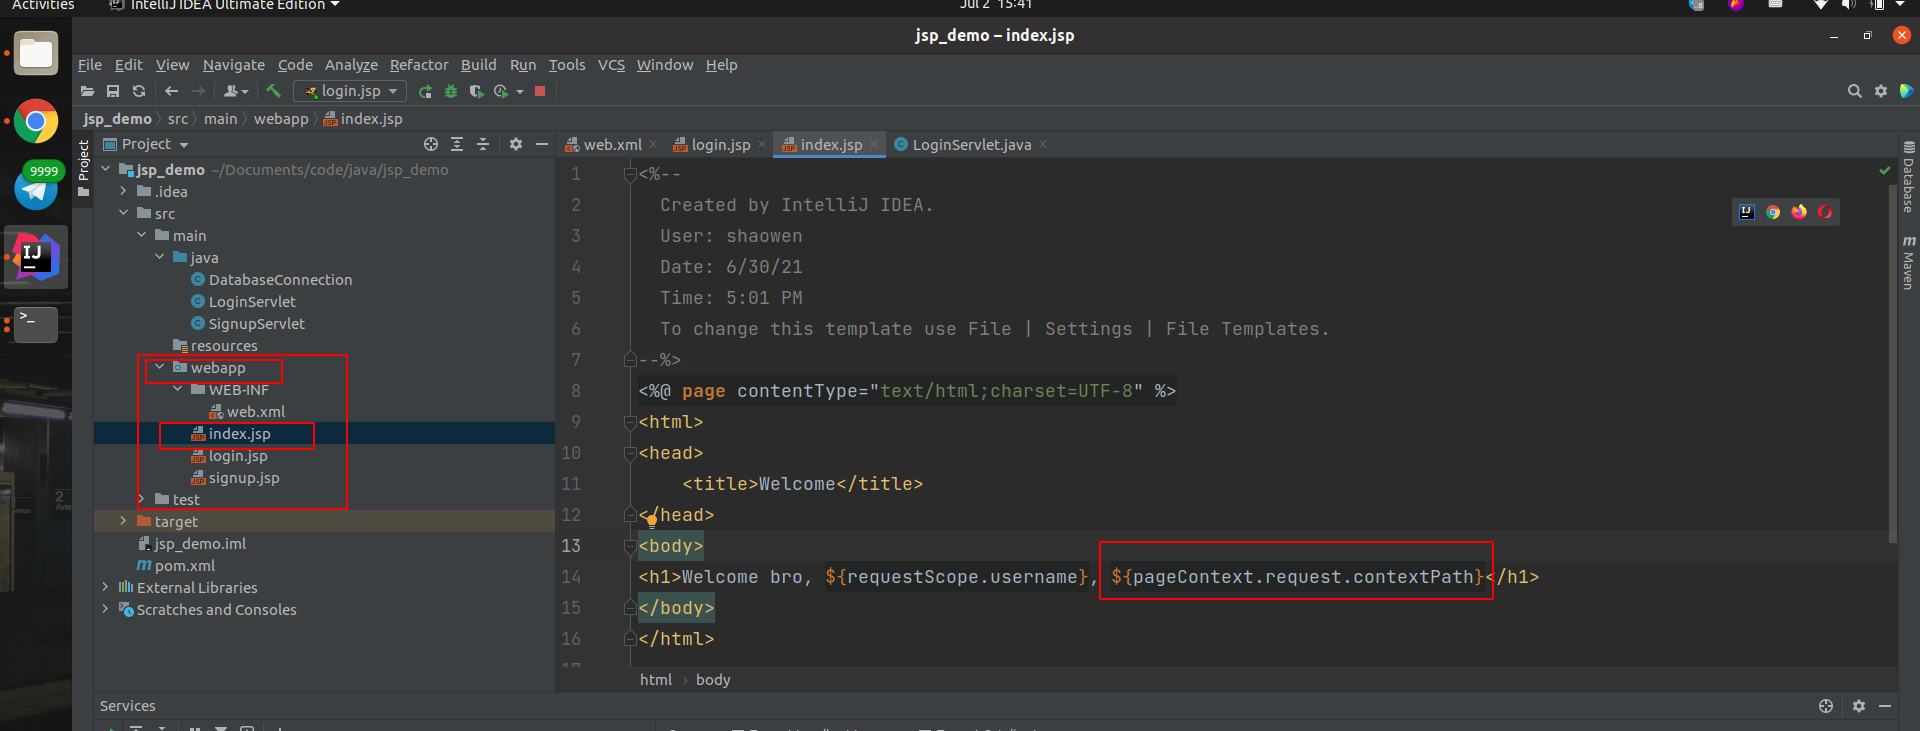

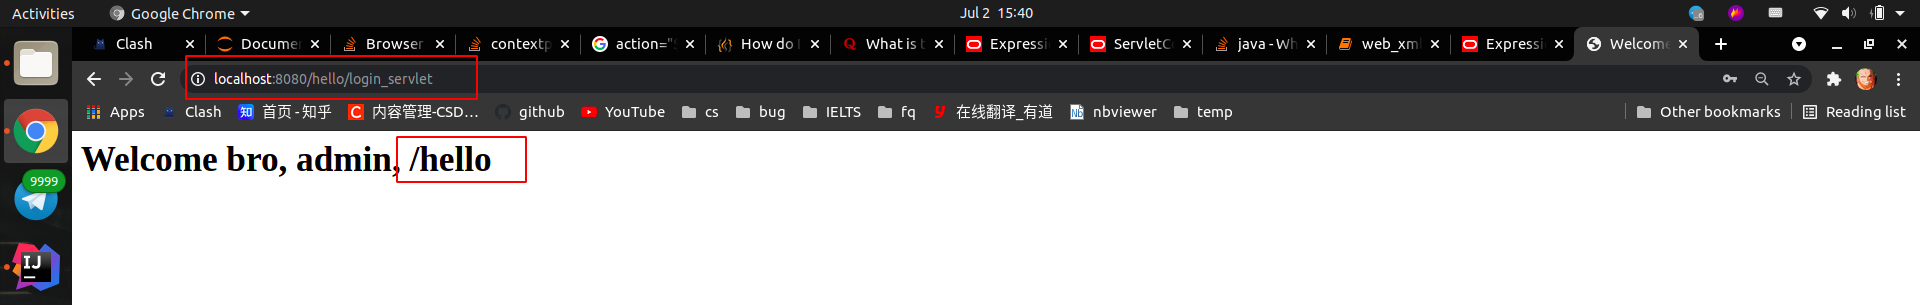

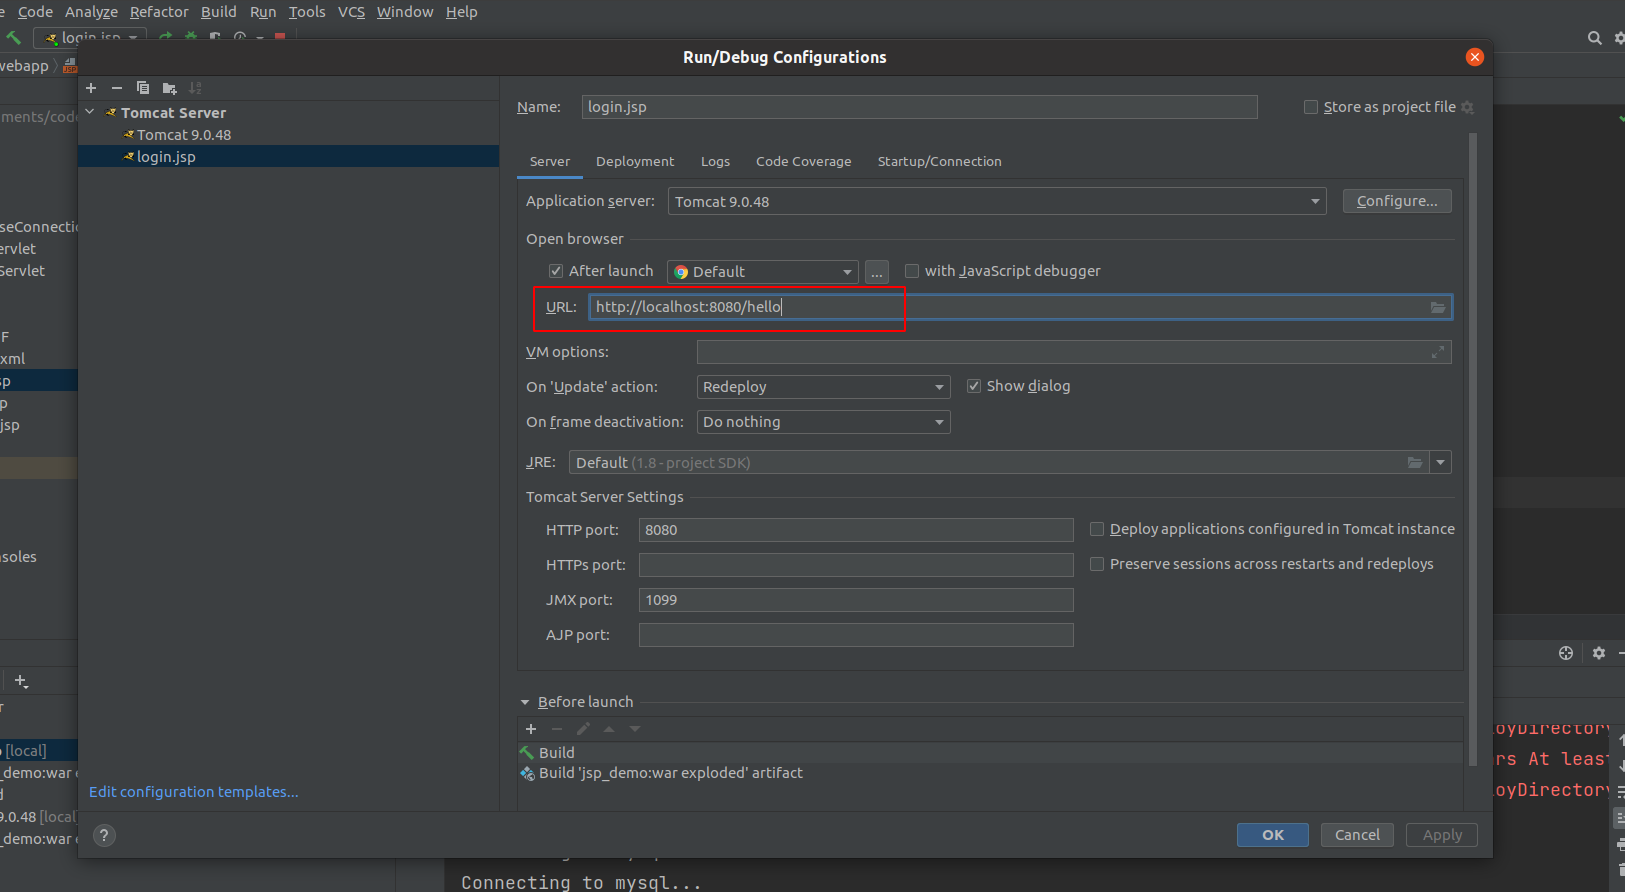


## Creating and Configuring Servlets
---

### Configuring Servlets

You define servlets as a part of a Web application in several entries(一些条目) in the J2EE standard Web Application deployment descriptor, web.xml. The web.xml file is located in the WEB-INF directory of your Web application.

The first entry, under the root `servlet` element in web.xml, defines a name for the servlet and specifies the compiled class that executes the servlet. (Or, instead of specifying a servlet class, you can specify a JSP.) The servlet element also contains definitions for initialization attributes and security roles for the servlet.

The second entry in web.xml, under the `servlet-mapping` element, defines the `URL pattern` that calls this servlet.

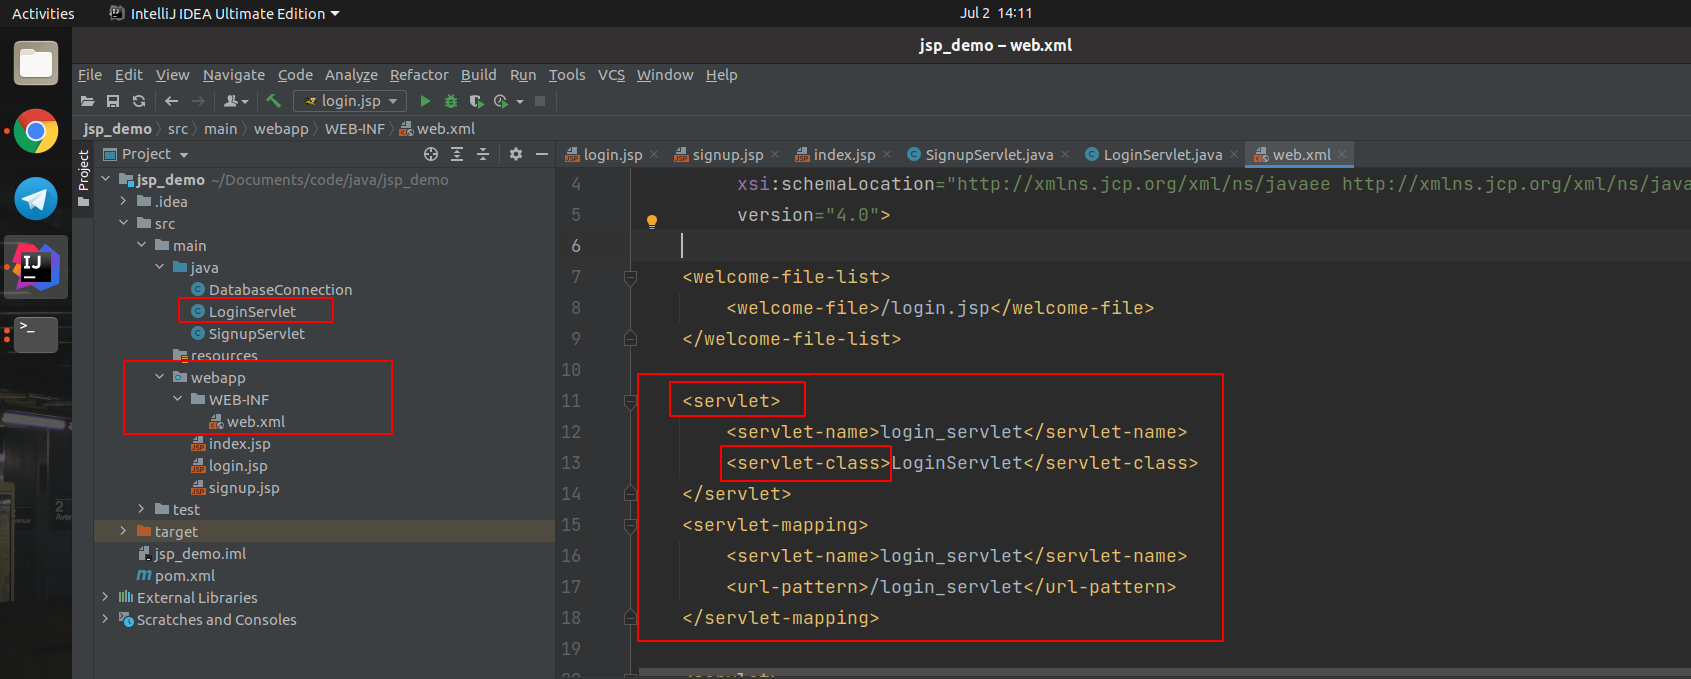

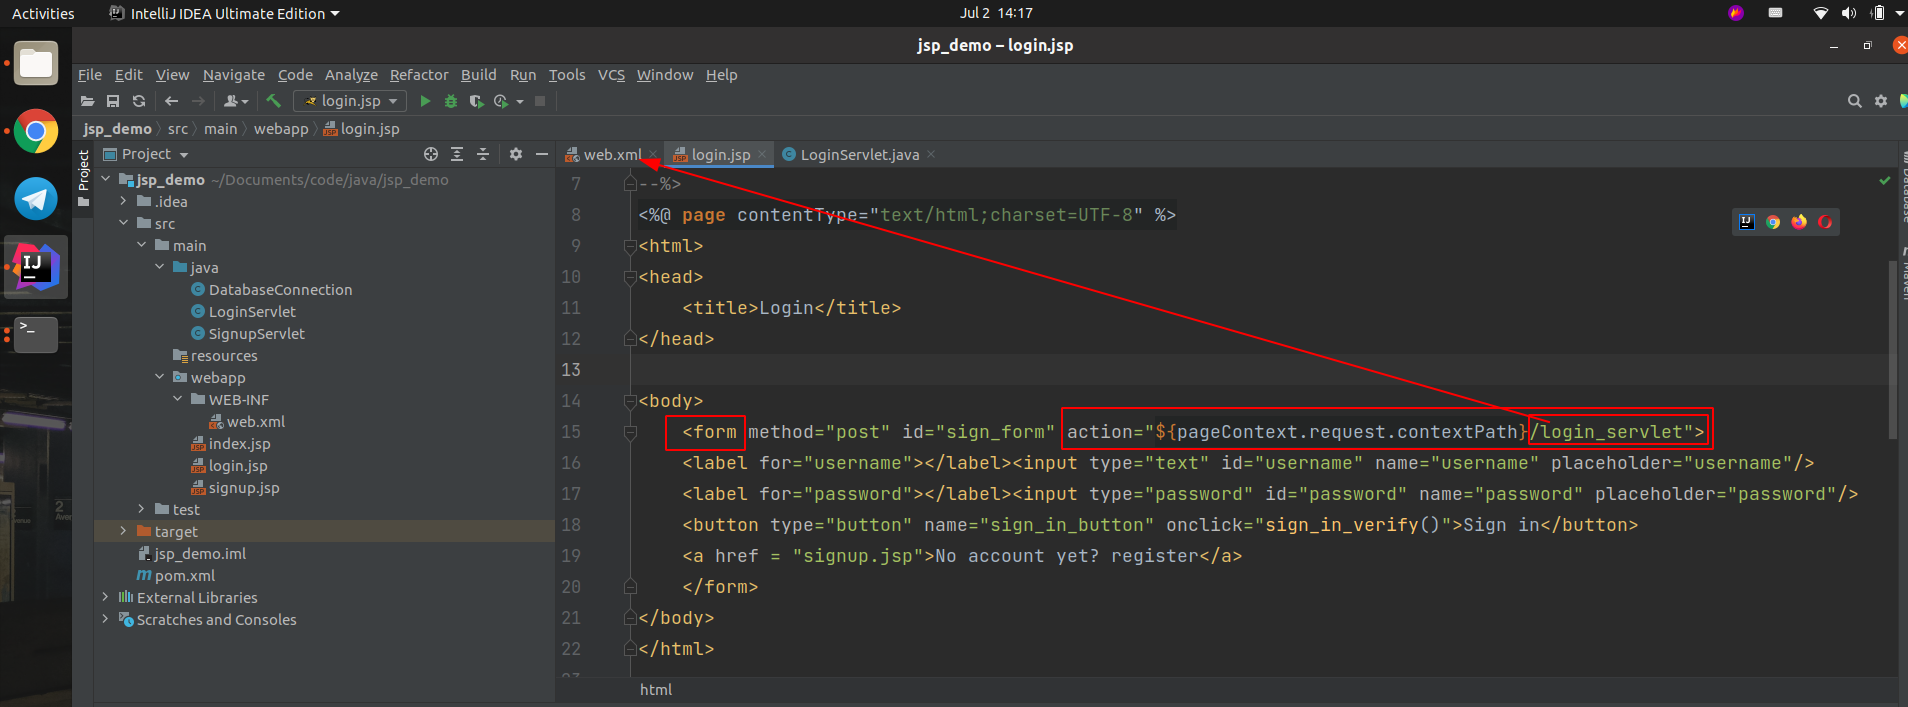

## URL
---

All relative URLs in the HTML page generated by the JSP file are relative to the current request URL (the URL as you see in the browser address bar) and **not** to the location of the JSP file in the server side as you seem to expect. 

It's namely the webbrowser who has to download those resources individually by URL, not the webserver who has to include them from disk somehow.

Apart from changing the relative URLs to make them relative to the URL of the servlet instead of the location of the JSP file, another way to fix this problem is to make them relative to the domain root (i.e. start with a `/`). This way you don't need to worry about changing the relative paths once again when you change the URL of the servlet.

```html
<!-- errors -->
<link href="styles/default.css" rel="stylesheet" type="text/css" />
<img src="images/image1.png" alt="Image1" />

<!-- right ways -->
<head>
    <link rel="stylesheet" href="/context/css/default.css" />
    <script src="/context/js/default.js"></script>
</head>
<body>
    <img src="/context/img/logo.png" />
    <a href="/context/page.jsp">link</a>
    <form action="/context/servlet"><input type="submit" /></form>
</body>

```

However, you would probably like not to hardcode the context path. Very reasonable. You can obtain the context path in EL by `${pageContext.request.contextPath}`.

```html
<head>
    <link rel="stylesheet" href="${pageContext.request.contextPath}/css/default.css" />
    <script src="${pageContext.request.contextPath}/js/default.js"></script>
</head>
<body>
    <img src="${pageContext.request.contextPath}/img/logo.png" />
    <a href="${pageContext.request.contextPath}/page.jsp">link</a>
    <form action="${pageContext.request.contextPath}/servlet"><input type="submit" /></form>
</body>
```

(which can easily be shortened by `<c:set var="root" value="${pageContext.request.contextPath}" />` and used as `${root}` elsewhere)

## Servlet Mapping using web.xml
---

I have a confusion regarding the structure of the web.xml for the servlet mapping, I don't have any problem by executing it but I am trying to figure it how why we have such a pattern in the deployment descriptor.

```html
<web-app>
    <servlet>
         <servlet-name>login_servlet_1</servlet-name>
         <servlet-path>com.LoginServlet</servlet-path>
    </servlet>
    <servlet-mapping>
         <servlet-name>login_servlet_1</servlet-name>
         <url-pattern>/enroll</url-pattern>
    </servlet-mapping>
</web-app>
```

Now as far as my understanding whenever(error: only once) a request is comes for url-pattern "/enroll", servlet container is going to match the `<servlet-name>` with the `<url-pattern>` and will try to find the corresponding `<servlet-path>` and will forward the control to `com.LoginServlet`. so basically there would be two passes one for finding `<servlet-name>` and another for `<servlet-path>`, my question is if container is designed to work in the following way

```html
<web-app>
        <servlet>
             <servlet-name>foo.Servlet</servlet-path>
             <url-pattern>/enroll</url-pattern>
        </servlet>
</web-app>

```

what would be the drawback if we use the following approach. Wouldn't that be more efficient and the response time would be fast.



### Answer:
It allows servlets to have multiple servlet mappings:
```html
<servlet>
    <servlet-name>Servlet1</servlet-name>
    <servlet-path>foo.Servlet</servlet-path>
</servlet>
<servlet-mapping>
    <servlet-name>Servlet1</servlet-name>
    <url-pattern>/enroll</url-pattern>
</servlet-mapping>
<servlet-mapping>
    <servlet-name>Servlet1</servlet-name>
    <url-pattern>/pay</url-pattern>
</servlet-mapping>
<servlet-mapping>
    <servlet-name>Servlet1</servlet-name>
    <url-pattern>/bill</url-pattern>
</servlet-mapping>
```

It allows filters to be mapped on the particular servlet:

```html
<filter-mapping>
    <filter-name>Filter1</filter-name>
    <servlet-name>Servlet1</servlet-name>
</filter-mapping>
```


Your proposal would support neither of them. Note that the `web.xml` is read and parsed only once during application's startup, **not** on every HTTP request as you seem to think.

Since Servlet 3.0, there's the `@WebServlet` annotation which minimizes this boilerplate:
```java
@WebServlet("/enroll")
public class Servlet1 extends HttpServlet {
    ...
}
```

## Servlet Mapping
---

Servlet mapping controls how you access a servlet. The following examples demonstrate how you can use servlet mapping in your Web application. In the examples, a set of servlet configurations and mappings (from the web.xml deployment descriptor) is followed by a table (see url-patterns and Servlet Invocation) showing the URLs used to invoke these servlets.

### Servlet Mapping Example

```xml
<servlet>
  <servlet-name>watermelon</servlet-name>
  <servlet-class>myservlets.watermelon</servlet-class>
</servlet>

<servlet>
  <servlet-name>garden</servlet-name>
  <servlet-class>myservlets.garden</servlet-class>
</servlet>

<servlet>
  <servlet-name>list</servlet-name>
  <servlet-class>myservlets.list</servlet-class>
</servlet>

<servlet>
  <servlet-name>kiwi</servlet-name>
  <servlet-class>myservlets.kiwi</servlet-class>
</servlet>

<servlet-mapping>
  <servlet-name>watermelon</servlet-name>
  <url-pattern>/fruit/summer/*</url-pattern>
</servlet-mapping>

<servlet-mapping>
  <servlet-name>garden</servlet-name>
  <url-pattern>/seeds/*</url-pattern>
</servlet-mapping>

<servlet-mapping>
  <servlet-name>list</servlet-name>
  <url-pattern>/seedlist</url-pattern>
</servlet-mapping>

<servlet-mapping>
  <servlet-name>kiwi</servlet-name>
  <url-pattern>*.abc</url-patter
</servlet-mapping>
```

### url-patterns and Servlet Invocation

| URL | Servlet Invoked |
| :---- | :----- |
| http://host:port/mywebapp/fruit/summer/index.html | watermelon |
| http://host:port/mywebapp/fruit/summer/index.abc | watermelon |
| http://host:port/mywebapp/seedlist | list |
| http://host:port/mywebapp/seedlist/index.html | The default servlet, if configured, or an HTTP 404 File Not Found error message. If the mapping for the list servlet had been /seedlist*, the list servlet would be invoked. |
| http://host:port/mywebapp/seedlist/pear.abc | kiwi. If the mapping for the list servlet had been /seedlist*, the list servlet would be invoked. |
| http://host:port/mywebapp/seeds | garden |
| http://host:port/mywebapp/seeds/index.html | garden |
| http://host:port/mywebapp/index.abc | kiwi |

ServletServlet can be used to create a default mappings for servlets. For example, to create a default mapping to map all servlets to /myservlet/*, so the servlets can be called using http://host:port/web-app-name/myservlet/com/foo/FooServlet, add the following to your web.xml file. (The web.xml file is located in the WEB-INF directory of your Web application.)

```xml
<servlet>
    <servlet-name>ServletServlet</servlet-name>
    <servlet-class>weblogic.servlet.ServletServlet</servlet-class>
</servlet>

<servlet-mapping>
    <servlet-name>ServletServlet</servlet-name>
    <url-pattern>/myservlet/*</url-pattern>
</servlet-mapping>
```

## How do servlets work? Instantiation, sessions, shared variables and multithreading
---


Suppose, I have a webserver which holds numerous servlets. For information passing among those servlets I am setting session and instance variables.

Now, if 2 or more users send request to this server then what happens to the session variables?
Will they all be common for all the users or they will be different for each user?
If they are different, then how was the server able to differentiate between different users?

One more similar question, if there are n users accessing a particular servlet, then this servlet gets instantiated only the first time the first user accessed it or does it get instantiated for all the users separately?
In other words, what happens to the instance variables?


> https://stackoverflow.com/questions/3106452/how-do-servlets-work-instantiation-sessions-shared-variables-and-multithreadi

## Answers
___


### ServletContext
When the servlet container (like Apache Tomcat) starts up, it will deploy and load all its web applications. When a web application is loaded, the servlet container creates the `ServletContext` once and keeps it in the server's memory. 

> Interface ServletContext:     
public interface ServletContext     
Defines a set of methods that a servlet uses to communicate with its servlet container, for example, to get the MIME type of a file, dispatch requests, or write to a log file.        
There is one context per "web application" per Java Virtual Machine. (A "web application" is a collection of servlets and content installed under a specific subset of the server's URL namespace such as /catalog and possibly installed via a .war file.)     


The web app's `web.xml` and all of included `web-fragment.xml` files is parsed, and each `<servlet>`, `<filter> `and `<listener>` found (or each class annotated with `@WebServlet`, `@WebFilter` and `@WebListener` respectively) is instantiated once and kept in the server's memory as well. For each instantiated filter, its `init()` method is invoked with a new `FilterConfig`.

When a Servlet has a `<servlet><load-on-startup>` or `@WebServlet(loadOnStartup)` value greater than `0`, then its `init()` method is also invoked during startup with a new `ServletConfig`. Those servlets are initialized in the same order specified by that value (`1` is 1st, `2` is 2nd, etc). If the same value is specified for more than one servlet, then each of those servlets is loaded in the same order as they appear in the `web.xml`, `web-fragment.xml`, or `@WebServlet` classloading. In the event the "load-on-startup" value is absent, the `init()` method will be invoked whenever the HTTP request hits that servlet for the very first time.

When the servlet container is finished with all of the above described initialization steps, then the `ServletContextListener#contextInitialized()` will be invoked.

When the servlet container shuts down, it unloads all web applications, invokes the `destroy()` method of all its initialized servlets and filters, and all `ServletContext`, `Servlet`, `Filter` and `Listener` instances are trashed. Finally the `ServletContextListener#contextDestroyed()` will be invoked.



### HttpServletRequest and HttpServletResponse

The servlet container is attached to a web server that listens for HTTP requests on a certain port number (port 8080 is usually used during development and port 80 in production). When a client (e.g. user with a web browser, or programmatically using `URLConnection`) sends an HTTP request, the servlet container creates new `HttpServletRequest` and `HttpServletResponse` objects and passes them through any defined `Filter` in the chain and, eventually, the `Servlet` instance.

In the case of filters, the `doFilter()` method is invoked. When the servlet container's code calls `chain.doFilter(request, response)`, the request and response continue on to the next filter, or hit the servlet if there are no remaining filters.

In the case of servlets, the `service()` method is invoked. By default, this method determines which one of the `doXxx()` methods to invoke based off of `request.getMethod()`. If the determined method is absent from the servlet, then an HTTP 405 error is returned in the response.

The request object provides access to all of the information about the HTTP request, such as its URL, headers, query string and body. The response object provides the ability to control and send the HTTP response the way you want by, for instance, allowing you to set the headers and the body (usually with generated HTML content from a JSP file). When the HTTP response is committed and finished, both the request and response objects are recycled and made available for reuse.

### HttpSession

When a client visits the webapp for the first time and/or the `HttpSession` is obtained for the first time via `request.getSession()`, the servlet container creates a new `HttpSession` object, generates a long and unique ID (which you can get by `session.getId()`), and stores it in the server's memory. The servlet container also sets a `Cookie` in the `Set-Cookie` header of the HTTP response with `JSESSIONID` as its name and the unique session ID as its value.


As per the HTTP `cookie` specification (a contract any decent web browser and web server must adhere to), the client (the web browser) is required to send this cookie back in subsequent requests in the Cookie header for as long as the cookie is valid (i.e. the unique ID must refer to an unexpired session and the domain and path are correct). Using your browser's built-in HTTP traffic monitor, you can verify that the `cookie` is valid (press F12 in Chrome / Firefox 23+ / IE9+, and check the Net/Network tab). The servlet container will check the Cookie header of every incoming HTTP request for the presence of the cookie with the name `JSESSIONID` and use its value (the session ID) to get the associated `HttpSession` from server's memory.

The `HttpSession` stays alive until it has been idle (i.e. not used in a request) for more than the timeout value specified in `<session-timeout>`, a setting in `web.xml`. The timeout value defaults to 30 minutes. So, when the client doesn't visit the web app for longer than the time specified, the servlet container trashes the session. Every subsequent request, even with the cookie specified, will not have access to the same session anymore; the servlet container will create a new session.
    

On the client side, the session cookie stays alive for as long as the browser instance is running. So, if the client closes the browser instance (all tabs/windows), then the session is trashed on the client's side. In a new browser instance, the cookie associated with the session wouldn't exist, so it would no longer be sent. This causes an entirely new `HttpSession` to be created, with an entirely new session cookie being used.


### In a nutshell

+ The `ServletContext` lives for as long as the web app lives. It is shared among all requests in all sessions.


+ The `HttpSession` lives for as long as the client is interacting with the web app with the same browser instance, and the session hasn't timed out at the server side. It is shared among all requests in the same session.


+ The `HttpServletRequest` and `HttpServletResponse` live from the time the servlet receives an HTTP request from the client, until the complete response (the web page) has arrived. It is not shared elsewhere.


+ All `Servlet`, `Filter` and `Listener` instances live as long as the web app lives. They are shared among all requests in all sessions.


+ Any `attribute` that is defined in `ServletContext`, `HttpServletRequest` and `HttpSession` will live as long as the object in question lives. The object itself represents the "scope" in bean management frameworks such as JSF, CDI, Spring, etc. Those frameworks store their scoped beans as an `attribute` of its closest matching scope.

### Thread Safety

That said, your major concern is possibly thread safety. You should now know that servlets and filters are shared among all requests. That's the nice thing about Java, it's multithreaded and different threads (read: HTTP requests) can make use of the same instance. It would otherwise be too expensive to recreate, `init()` and `destroy()` them for every single request.

You should also realize that you should **never** assign any request or session scoped data as an instance variable of a servlet or filter. It will be shared among all other requests in other sessions. That's not thread-safe! The below example illustrates this:

```java
public class ExampleServlet extends HttpServlet {

    private Object thisIsNOTThreadSafe;

    protected void doGet(HttpServletRequest request, HttpServletResponse response) throws ServletException, IOException {
        Object thisIsThreadSafe;

        thisIsNOTThreadSafe = request.getParameter("foo"); // BAD!! Shared among all requests!
        thisIsThreadSafe = request.getParameter("foo"); // OK, this is thread safe.
    } 
}
```